In [1]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2260668, 145)

In [4]:
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

In [5]:
df_null[df_null['Count'] > 0] 

,Count,Percent
id,2260668,100.000000
member_id,2260668,100.000000
emp_title,166969,7.385826
emp_length,146907,6.498389
annual_inc,4,0.000177
url,2260668,100.000000
desc,2134601,94.423462
title,23325,1.031775
zip_code,1,0.000044
dti,1711,0.075686


In [6]:
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))    #dropping coluns which has 80% and high na values

In [7]:
df1.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [8]:
df_LC = df1.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])   #getting the important features for our analysis
df_LC.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
dtype: object

In [18]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes,status=df_LC.loan_status.astype('category').cat.codes).corr(),
                        
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

AttributeError: 'DataFrame' object has no attribute 'grade'

<Figure size 1440x1440 with 0 Axes>

In [9]:
df_LC.drop(['installment','grade','sub_grade','verification_status','term']
           , axis=1, inplace = True)   #dropping the unnecessary features

In [10]:
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
emp_length,146907,6.498389
annual_inc,4,0.000177
dti,1711,0.075686
delinq_2yrs,29,0.001283


In [11]:
df1_LC = df_LC.dropna(axis=0) #dropping all the rows which contains null value

In [12]:
df1_LC.isnull()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [13]:
len(df1_LC) - df1_LC.count() #checking the null values

loan_amnt         0
int_rate          0
emp_length        0
home_ownership    0
annual_inc        0
purpose           0
dti               0
delinq_2yrs       0
loan_status       0
dtype: int64

In [17]:
corr = df1.corr()['loan_status'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

KeyError: 'loan_status'

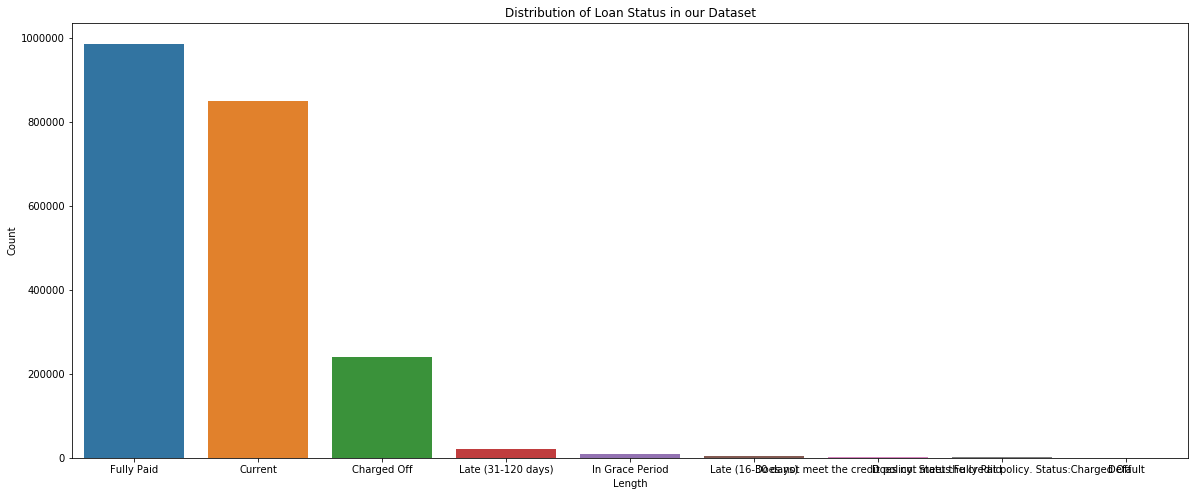

In [14]:
m =df1_LC['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Loan Status in our Dataset")
plt.show()     #ploting an histogram of values against count of times the status appears on the dataframe



In [15]:
df1_LC = df1_LC[df1_LC.loan_status != 'Current']
df1_LC = df1_LC[df1_LC.loan_status != 'In Grace Period']
df1_LC = df1_LC[df1_LC.loan_status != 'Late (16-30 days)']
df1_LC = df1_LC[df1_LC.loan_status != 'Late (31-120 days)']
df1_LC = df1_LC[df1_LC.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df1_LC = df1_LC[df1_LC.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df1_LC = df1_LC[df1_LC.loan_status != 'Issued']


In [16]:
df1_LC['loan_status'] = df1_LC['loan_status'].replace({'Charged Off':'Default'})
df1_LC['loan_status'].value_counts()

Fully Paid    986880
Default       241287
Name: loan_status, dtype: int64

In [17]:
df1_LC.loan_status=df1_LC.loan_status.astype('category').cat.codes
df1_LC.delinq_2yrs=df1_LC.delinq_2yrs.astype('category').cat.codes
df1_LC.head()
df1_LC['loan_status'].value_counts()


1    986880
0    241287
Name: loan_status, dtype: int64

In [18]:
df1_LC.head(5)

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
100,30000,22.35,5 years,MORTGAGE,100000.0,debt_consolidation,30.46,0,1
152,40000,16.14,< 1 year,MORTGAGE,45000.0,credit_card,50.53,0,1
170,20000,7.56,10+ years,MORTGAGE,100000.0,credit_card,18.92,0,1
186,4500,11.31,10+ years,RENT,38500.0,credit_card,4.64,0,1
215,8425,27.27,3 years,MORTGAGE,450000.0,credit_card,12.37,0,1


In [19]:
df1_LC = pd.get_dummies(df1_LC, drop_first=True)

In [20]:
df1_LC.head(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,loan_status,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
100,30000,22.35,100000.0,30.46,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,40000,16.14,45000.0,50.53,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,20000,7.56,100000.0,18.92,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,4500,11.31,38500.0,4.64,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,8425,27.27,450000.0,12.37,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df1_LC.shape

(1228167, 34)

In [22]:

import xgboost as xgb
from xgboost import Booster as booster


ModuleNotFoundError: No module named 'xgboost'

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1_LC.drop('loan_status',axis=1),df1_LC['loan_status'],test_size=0.4,random_state=101)

In [28]:
print(X_test)

         loan_amnt  int_rate  annual_inc    dti  delinq_2yrs  \
908973       20000     18.99    80000.00  21.57            3   
1923681       9600     13.35    70200.00  14.94            1   
1695785      17500     23.10    86000.00  23.60            1   
1942713      12000      6.03    95000.00   7.71            0   
1129450      19075     16.99   125000.00  16.93            2   
1279175      11500      9.99    52000.00  26.31            0   
1698033      21000     21.00    75000.00  31.10            0   
2074057      13725      6.62    67500.00  11.62            0   
787309       20200     11.47    65000.00  12.00            0   
2033962       6500     15.31    67000.00  15.67            0   
324628       20000     17.47    86000.00  25.33            3   
1221863      25000      9.99   135000.00  20.39            0   
1197928      12000      7.26    34280.00  12.11            0   
1787829      35000     19.05    85000.00  27.64            0   
1058489      16000      5.32    72000.00

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [31]:
from joblib import dump, load
dump(sc, 'standart_scaler2.bin', compress=True)

['standart_scaler2.bin']

In [35]:
from imblearn.over_sampling import SMOTE #using SMOTE to balance the training data

Using TensorFlow backend.


In [36]:
sm = SMOTE(random_state=12)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [37]:
dtrain = xgb.DMatrix(x_train_r, label=y_train_r)
dtest = xgb.DMatrix(X_test,label=y_test)

In [38]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]
param = {'objective': 'binary:logistic','learning_rate':0.3, 'max_depth':6,'gamma':0,'min_child_weight':1,'nthread':3,'n_estimators':1000}  
param['eval_metric'] = ['error']

In [39]:
num_round = 300
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-error:0.42871	train-error:0.33432
[1]	eval-error:0.38724	train-error:0.31662
[2]	eval-error:0.36001	train-error:0.30463
[3]	eval-error:0.35800	train-error:0.29689
[4]	eval-error:0.34828	train-error:0.28725
[5]	eval-error:0.35510	train-error:0.28433
[6]	eval-error:0.33694	train-error:0.27472
[7]	eval-error:0.33644	train-error:0.27179
[8]	eval-error:0.33379	train-error:0.27019
[9]	eval-error:0.32963	train-error:0.26346
[10]	eval-error:0.32609	train-error:0.25920
[11]	eval-error:0.32751	train-error:0.25786
[12]	eval-error:0.32223	train-error:0.25549
[13]	eval-error:0.32281	train-error:0.25450
[14]	eval-error:0.32170	train-error:0.25286
[15]	eval-error:0.32013	train-error:0.25164
[16]	eval-error:0.31493	train-error:0.24661
[17]	eval-error:0.31493	train-error:0.24434
[18]	eval-error:0.31471	train-error:0.24347
[19]	eval-error:0.31094	train-error:0.23876
[20]	eval-error:0.31041	train-error:0.23814
[21]	eval-error:0.30732	train-error:0.23416
[22]	eval-error:0.30219	train-error:0.2283

In [40]:
ypred = bst.predict(dtest)
print(ypred)

[0.5803233  0.65579534 0.6042237  ... 0.8030516  0.7973676  0.66623366]


In [51]:
data = [
	{'loan_amnt' :40000,
    'int_rate' :56.14,
    'annual_inc' :895,
    'dti' : 50.53,
    'delinq_2yrs': 0,
    'emp_length_10+ years' : 0,
    'emp_length_2 years' : 0,
    'emp_length_3 years' : 0,
    'emp_length_4 years' : 0,
    'emp_length_5 years' : 0,
    'emp_length_6 years' : 0,
    'emp_length_7 years' : 0,
    'emp_length_8 years' : 0,
    'emp_length_9 years' : 0,
    'emp_length_<1 years' : 1, 
    'home_ownership_MORTGAGE' :0,
    'home_ownership_NONE' : 0,
    'home_ownership_OWN' : 0,
    'home_ownership_OTHER' : 0,
    'home_ownership_RENT' : 1,
    'purpose_credit_card' : 0,
    'purpose_debt_consolidation' : 0,
    'purpose_educational' : 0,
    'purpose_home_improvement' : 0,
    'purpose_house' : 0,
    'purpose_major_purchase' : 0,
    'purpose_medical' : 0,
    'purpose_moving' : 0,
    'purpose_other' : 0,
    'purpose_renewable_energy' : 0,
    'purpose_small_business' : 0,
    'purpose_vacation' : 0,
    'purpose_wedding' : 1
    } ]

In [53]:
import pandas
df = pandas.DataFrame(data)
dataframe = sc.transform(df)
print(dataframe)
dtest2 = xgb.DMatrix(dataframe)

ypred = bst.predict(dtest2)
print(ypred)

[[-1.56910740e+00 -2.78158019e+00 -1.09553359e+00 -1.92133436e+00
  -3.64708162e-01 -7.32574204e-01 -3.25366983e-01 -3.04359108e-01
  -2.60575941e-01 -2.66626317e-01 -2.28042610e-01 -2.22646735e-01
   4.44312807e+00 -2.05602060e-01 -3.04856538e-01 -9.94537919e-01
  -6.05320748e-03  8.76073151e+01  1.85585688e+02  8.16179746e+04
  -5.28984552e-01 -1.18387241e+00 -1.62275801e-02 -2.60890570e-01
  -7.26598686e-02 -1.49467548e-01 -1.06991768e-01 -8.36705840e-02
  -2.44817227e-01 -2.68027588e-02 -1.09360753e-01 -8.13363699e-02
   2.34291565e+01]]
[0.99515957]


In [42]:

#bst.save_model('model.json') 

In [43]:
#print("Test Result:\n")        
#print("accuracy score: {0:.4f}\n".format(accuracy_score(dtest, bst.predict(dtest))))#
#print("Classification Report: \n {}\n".format(classification_report(dtest, bst.predict(dtest))))
#print("Confusion Matrix: \n {}\n".format(confusion_matrix(dtest, bst.predict(dtest))))    